In [1]:
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('dark_background')
from sklearn.datasets import load_iris
from numpy.linalg import norm

In [2]:
iris_X, iris_y = load_iris(True)
data = np.c_[iris_X, iris_y]
np.random.shuffle(data)
iris_X, iris_y = data[:,:4], np.squeeze(data[:,4:])
X_train, X_test = iris_X[:100], iris_X[100:]
y_train, y_test = iris_y[:100], iris_y[100:]

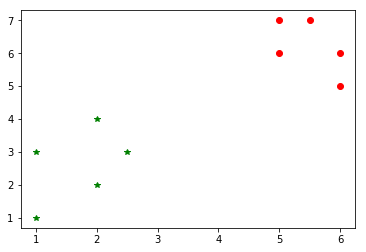

In [3]:
X = np.array([
    [1,1],
    [2,2],
    [6,6],
    [5,6],
    [1,3],
    [2,4],
    [6,5],
    [5,7],
    [2.5,3],
    [5.5, 7]
])
colors = ['r', 'g']
for index, (x_cord, y_cord) in enumerate(X):
    if x_cord > 4:
        plt.plot(x_cord, y_cord, marker = 'o', color = 'r')
    elif x_cord < 4:
        plt.plot(x_cord, y_cord, marker = '*', color = 'g')

In [4]:
class K_Means:
    def __init__(self, k = 2, max_iter = 300, tol = 0.0001):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X):
        self.centroids = {i:X[i] for i in range(self.k)}
        #print(self.centroids)
        
        for i in range(self.max_iter):
            self.classifications = {i:[] for i in range(self.k)}
            
            for row in X:
                distances = np.sqrt([np.sum((row - self.centroids[centroid])**2) for centroid in self.centroids])
                self.classifications[np.argmin(distances)].append(row)
                
            prev_centroids = self.centroids
            
            for classification in self.classifications:
                self.centroids[classification] = np.mean(self.classifications[classification], axis = 0)
            
            optimize = True
            
            for c in self.centroids:
                prev_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                error = np.sum((current_centroid - prev_centroid)/ prev_centroid* 100) 
                if error > self.tol:
                    optimize = False
        
                if optimize:
                    break
        #print(self.centroids)        
        
    def predict(self, X):
        distances = np.sqrt([np.sum((row - self.centroids[centroid])**2) for centroid in self.centroids])
        return np.argmin(distances)

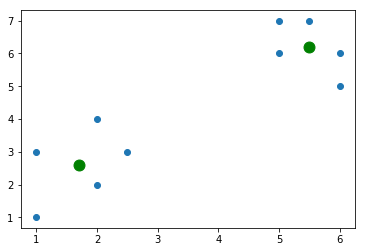

In [5]:
km = K_Means(2)
km.fit(X)
centers = list(km.centroids.values())
plt.scatter(X[:,0], X[:,1])
for center in centers:
    plt.scatter(center[0], center[1], s = 120, marker = 'o', color = 'g')

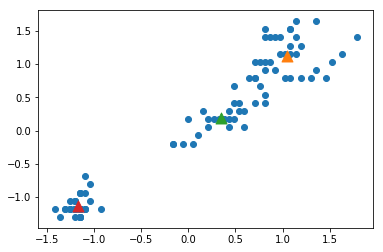

In [6]:
x_mean = np.mean(X_train, axis = 0)
x_std = np.std(X_train, axis = 0)
X_std = (X_train - x_mean)/x_std

plt.scatter(X_std[:, 2], X_std[:, 3])
km = K_Means(k = 3)
km.fit(X_std[:,2:5])
centers = list(km.centroids.values())
for center in centers:
    plt.scatter(center[0], center[1], s = 120, marker = '^')

In [7]:
np.sort(centers)

array([[ 1.0483946 ,  1.12554448],
       [ 0.18228079,  0.34716883],
       [-1.17231283, -1.13162454]])

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(X_std[:,2:5])
np.sort(kmeans.cluster_centers_)

array([[ 0.18228079,  0.34716883],
       [-1.17231283, -1.13162454],
       [ 1.0483946 ,  1.12554448]])

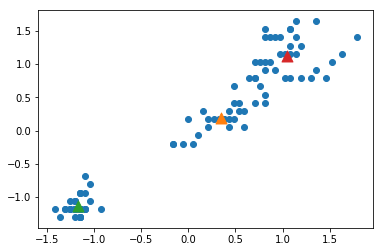

In [9]:
plt.scatter(X_std[:, 2], X_std[:, 3])
for center in kmeans.cluster_centers_:
    plt.scatter(center[0], center[1], s = 120, marker = '^')